Load Dataset

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt

dataframe = pd.read_csv("adult.data")

Check DF dimensions

In [41]:
dataframe.shape

(32560, 15)

In [42]:
dataframe.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [43]:
dataframe.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [44]:
colnames = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours Per Week",
    "Native Country",
    "Income"
]

dataframe.columns = colnames

In [45]:
#check for null values
dataframe.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours Per Week    0
Native Country    0
Income            0
dtype: int64

In [46]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education Num     32560 non-null int64
Marital Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital Gain      32560 non-null int64
Capital Loss      32560 non-null int64
Hours Per Week    32560 non-null int64
Native Country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
df = dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
catdf = df.select_dtypes(exclude=numerics)
numdf = df.select_dtypes(include=numerics)

In [48]:
#obtain categorical and numerical columns
catcols = catdf.columns
numcols = numdf.columns

In [49]:
df.duplicated().value_counts()

False    32536
True        24
dtype: int64

In [50]:
#number of duplicates
len_dfDup = len(df[df.duplicated()])
dfDup = df[df.duplicated()]
print(len_dfDup)
dfDup

#number of duplicated rows including original
# dpDup2 = df[df.duplicated(keep = False)]
# len(dpDup2)

df = df.drop_duplicates()
df.head()

24


,Age,Workclass,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [51]:
#drop education column (using education number)
df.drop(['Education'], axis = 1, inplace = True)
df.head()

/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Workclass,Fnlwgt,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [52]:
#percentage of people who are below 50k
df['Income'].value_counts()
LT50K = df['Income'].value_counts()[0]
GT50K = df['Income'].value_counts()[1]
Perc_LT50K = (LT50K/df.shape[0]) * 100
Perc_GT50K = (GT50K/df.shape[0]) * 100
print('Percentage of people less than or equal 50k salary', Perc_LT50K)
print('Percentage of people greater than 50k salary', Perc_GT50K)


Percentage of people less than or equal 50k salary 75.90668797639538
Percentage of people greater than 50k salary 24.093312023604625


In [53]:
#function to find percentage of ? values / attribute
for col in df.columns:
#     print(col)
    total = df[col].count()

    vals = df[col].value_counts()
    dic_vals = vals.to_dict()
#     print(dic_vals)
    for k,v in dic_vals.items():
        if k == ' ?':
            missing = v
            print(col)
            print("Percentage of missing values: ", (missing/total) * 100)
            

Workclass
Percentage of missing values:  5.6429800835997055
Occupation
Percentage of missing values:  5.66449471354807
Native Country
Percentage of missing values:  1.7887878042783376


In [54]:
#impute ? values

# vals1 = df['Workclass'].value_counts()
# vals2 = df['Occupation'].value_counts()
# vals3 = df['Native Country'].value_counts()
# print(vals1)
# print(vals2)
# print(vals3)

# df[['Workclass', 'Occupation', 'Native Country']].mode()

for val in df['Workclass']:
    if val == ' ?':
        df['Workclass'].replace({' ?': ' Private'}, inplace=True)

for val in df['Occupation']:
    if val == ' ?':
        df['Occupation'].replace({' ?': ' Prof-specialty'}, inplace=True)

for val in df['Native Country']:
    if val == ' ?':
        df['Native Country'].replace({' ?': ' United-States'}, inplace=True)

# updated_vals1 = df['Workclass'].value_counts()
# updated_vals2 = df['Occupation'].value_counts()
# updated_vals3 = df['Native Country'].value_counts()
# print(updated_vals1)
# print(updated_vals2)
# print(updated_vals3)
   


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [55]:
# native country attribute percentage breakdown
# vals = df['Native Country'].value_counts()
# total = df['Native Country'].count()
# dic_vals = vals.to_dict()
# for k,v in dic_vals.items():
#     print(k, ": ", (v / total) * 100)

# feature engineering for countries with percentage < 1% into 'Other' group
for val in df['Native Country']:
#     print(val)
    if val != ' United-States' and val != ' Mexico':
# #         print('yes bitch')
        df['Native Country'].replace({val: ' Other_Native_Country'}, inplace=True)

vals = df['Native Country'].value_counts()
# print(vals)
total = df['Native Country'].count()
dic_vals = vals.to_dict()
for k,v in dic_vals.items():
    print(k, ": ", (v / total) * 100)


 United-States :  91.38800098352594
 Other_Native_Country :  6.648020654044751
 Mexico :  1.963978362429309


In [56]:
#bin age into 4 buckets: 17-28; 29-37; 38-48; 49-90
df['Age'].describe()
quantile_list = [0, .25, .5, .75, 1]
label=['Young', 'Middle-Aged', 'Old', 'Retired']
#df['age_labels'] = pd.qcut(df['Income'], q=quantile_list, labels=label)
df['age_labels'] = pd.cut(x=df['Age'], bins=[16, 28, 37, 48, 90], labels=['Young', 'Middle-Aged', 'Old', 'Retired'], right=True)
df.columns

#df['age_labels'].value_counts()

/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['Age', 'Workclass', 'Fnlwgt', 'Education Num', 'Marital Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours Per Week', 'Native Country', 'Income',
       'age_labels'],
      dtype='object')

In [57]:
#update cat and num cols
catdf = df.select_dtypes(exclude=numerics)
numdf = df.select_dtypes(include=numerics)
catcols = catdf.columns
numcols = numdf.columns
print(catcols, numcols)


Index(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native Country', 'Income', 'age_labels'],
      dtype='object') Index(['Age', 'Fnlwgt', 'Education Num', 'Capital Gain', 'Capital Loss',
       'Hours Per Week'],
      dtype='object')


Age


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


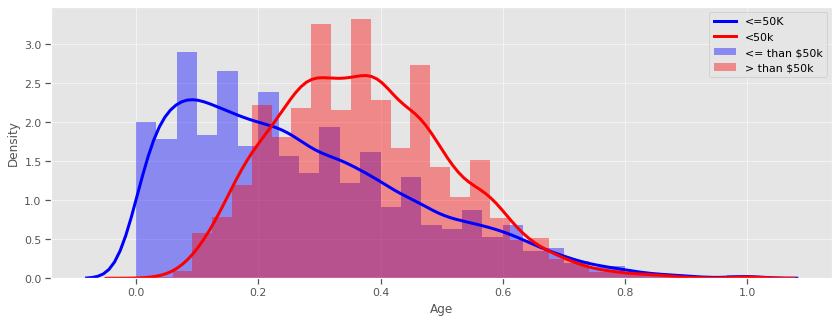

Fnlwgt


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


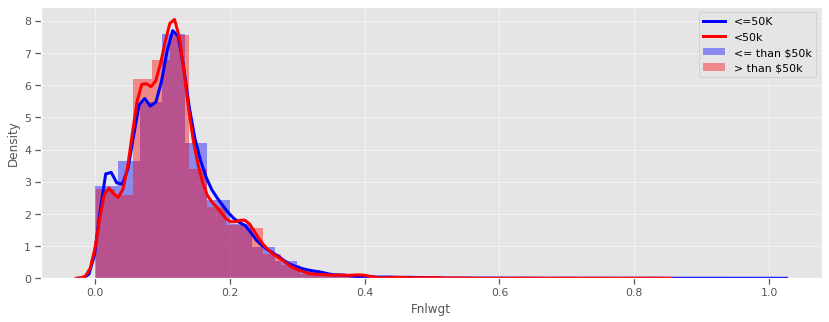

Education Num


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


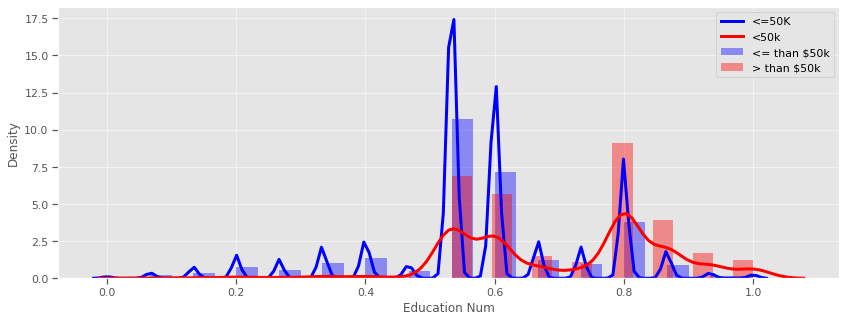

Capital Gain


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


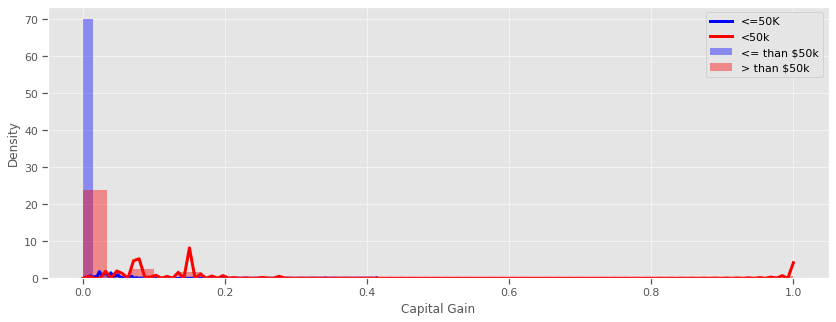

Capital Loss


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


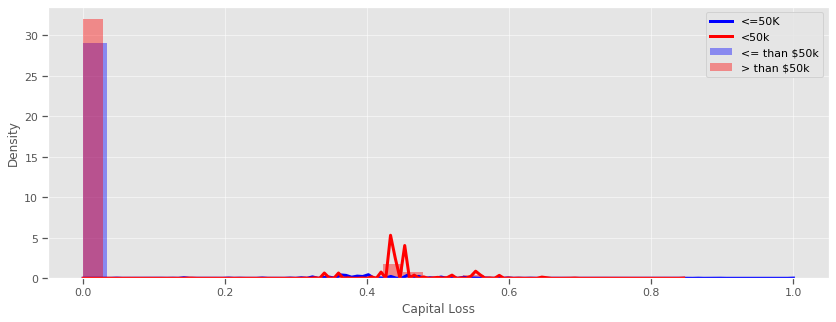

Hours Per Week


/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kartikpanchal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


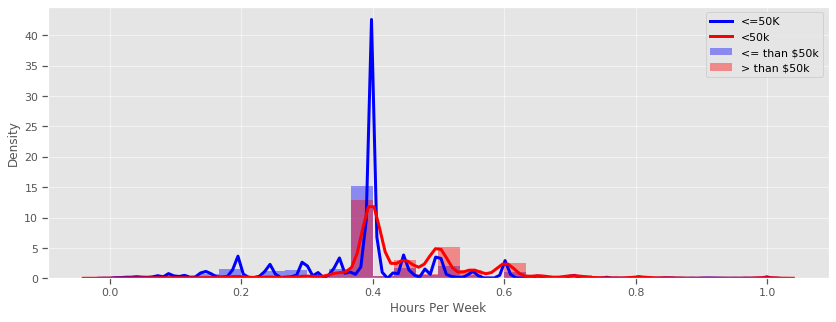

In [58]:
# #normalize numerical values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in numcols:
    #if col != 'Education Num':
    print(col)
    df[[col]] = scaler.fit_transform(df[[col]])
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    sns.distplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k',bins=30, kde_kws={"color": "b", "lw": 3, "label": "<=50K"}, hist_kws={"color": "b", "label": "<=50K"} )
    sns.distplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k',bins=30, kde_kws={"color": "r", "lw": 3, "label": "<50k"},  hist_kws={"color": "r", "label": "<50k"}) 
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    


Age


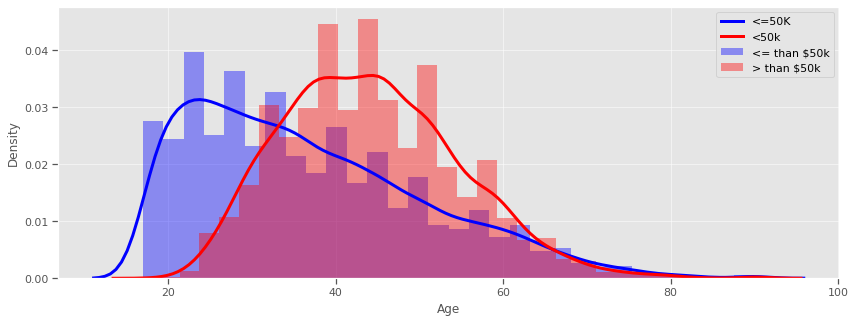

Fnlwgt


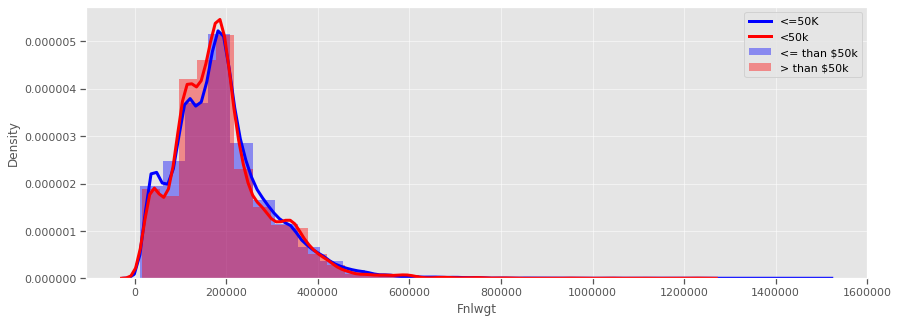

Education Num


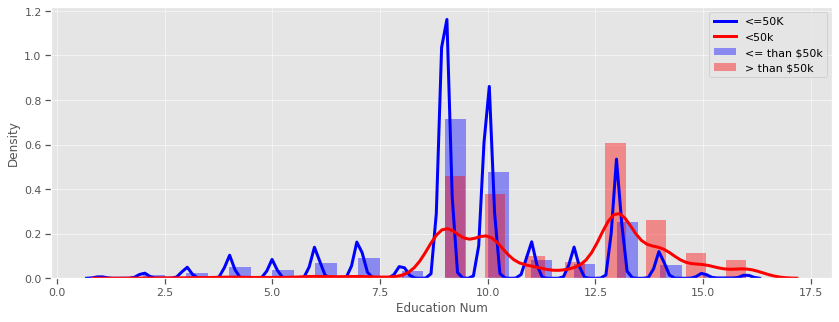

Capital Gain


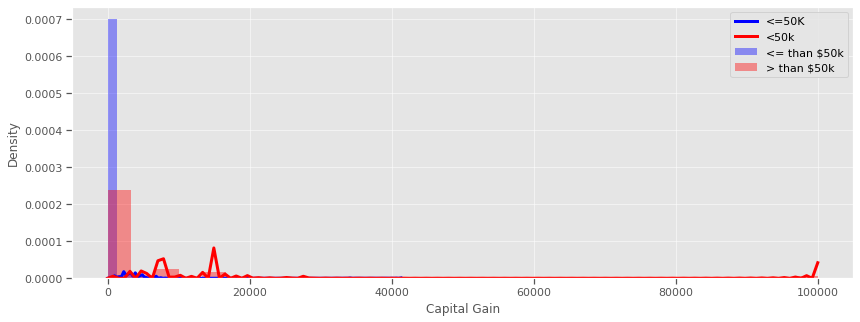

Capital Loss


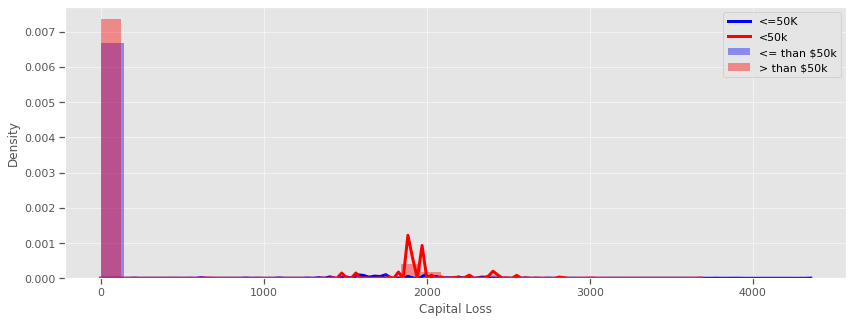

Hours Per Week


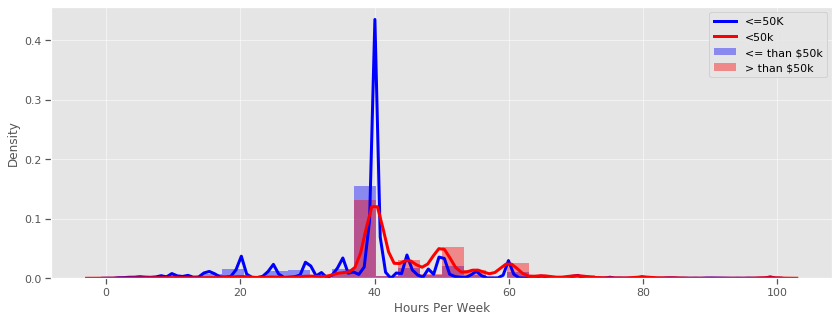

In [59]:
for col in numcols:
    #if col != 'Education Num':
    print(col)
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    sns.distplot(dataframe.loc[dataframe['Income'] == ' <=50K', col], label = '<= than $50k',bins=30, kde_kws={"color": "b", "lw": 3, "label": "<=50K"}, hist_kws={"color": "b", "label": "<=50K"} )
    sns.distplot(dataframe.loc[dataframe['Income'] == ' >50K', col], label = '> than $50k',bins=30, kde_kws={"color": "r", "lw": 3, "label": "<50k"},  hist_kws={"color": "r", "label": "<50k"}) 
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    

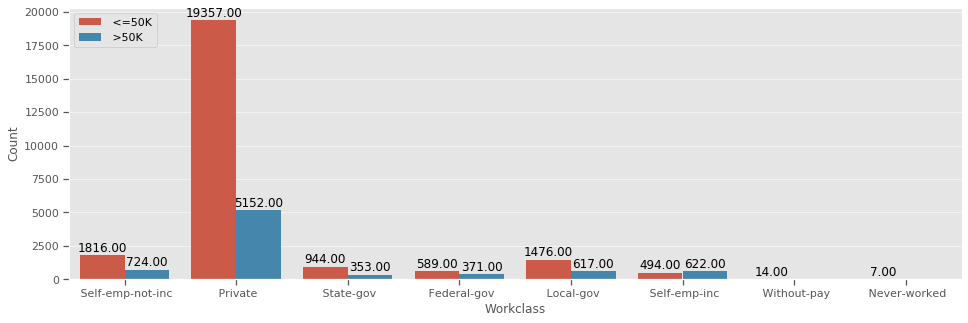

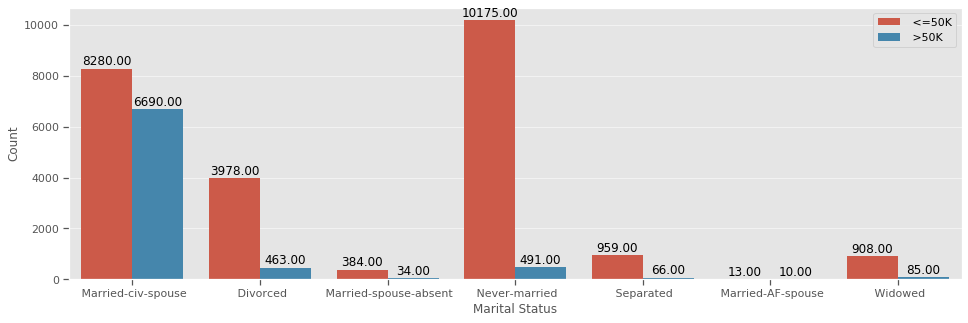

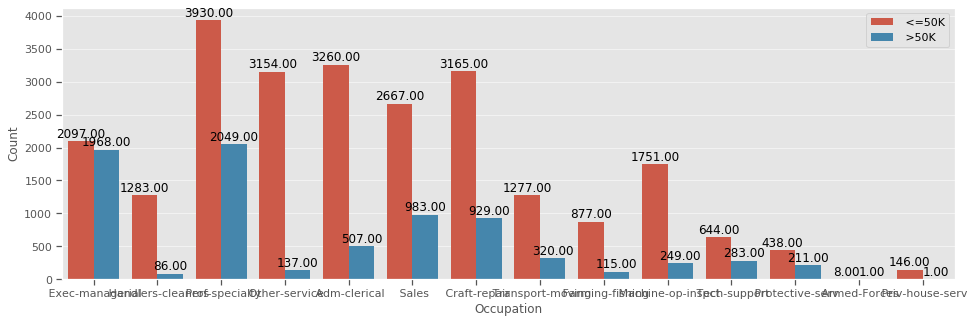

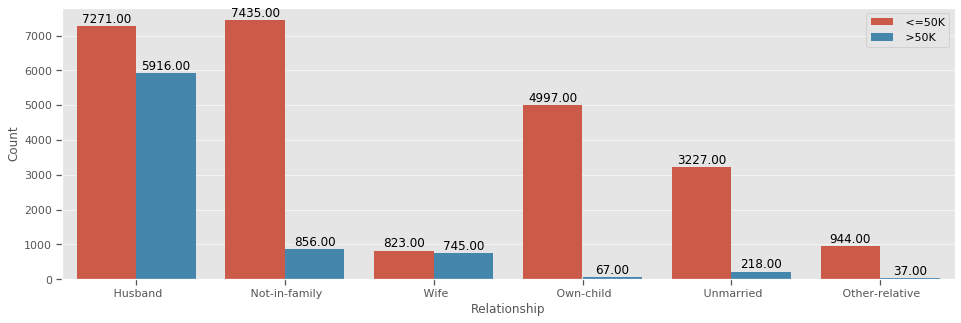

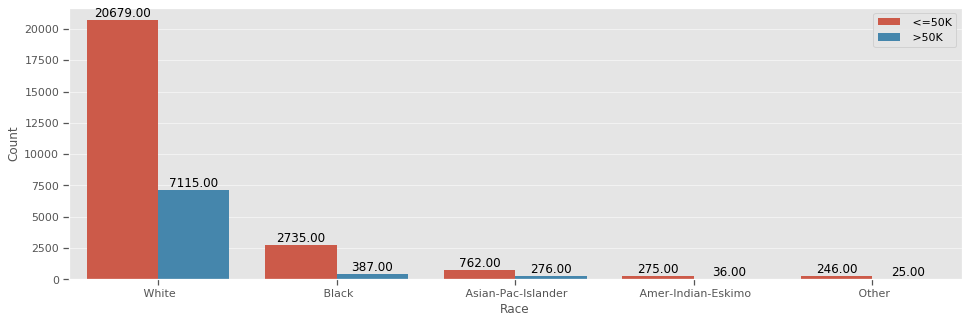

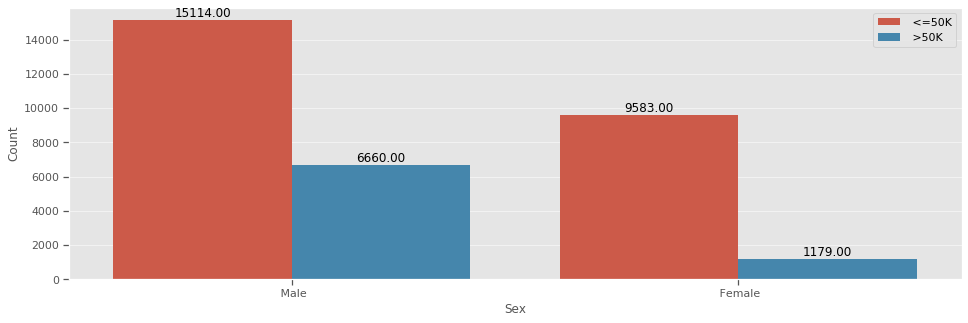

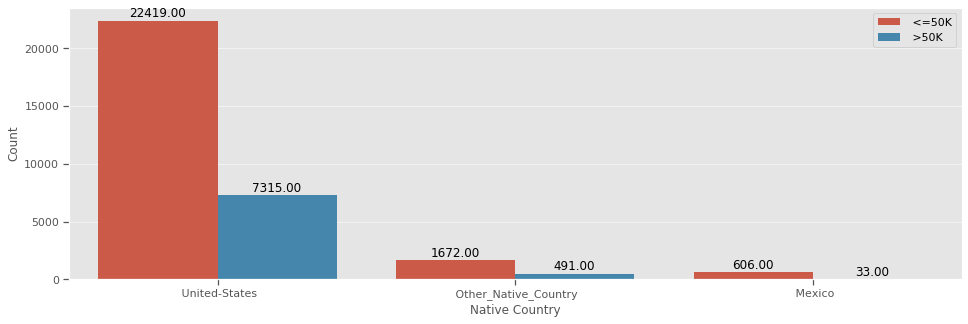

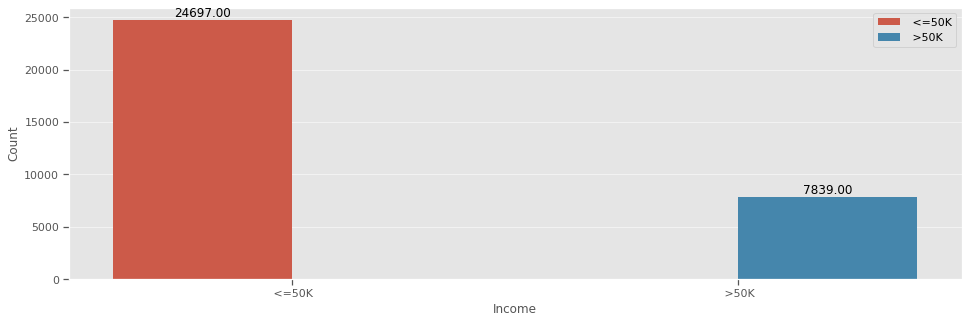

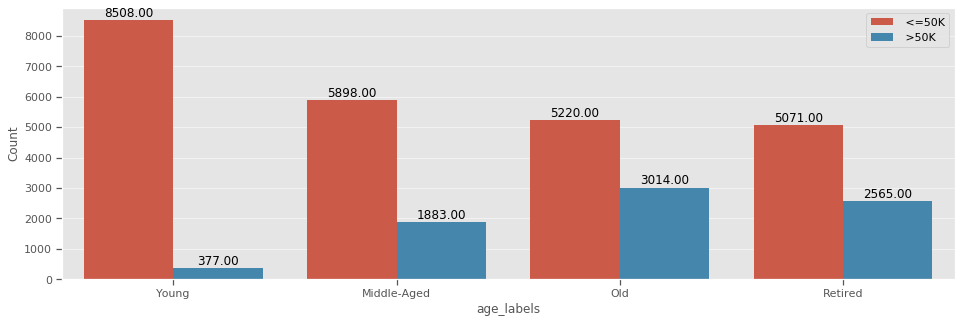

In [60]:
for col in catcols:
    plt.figure(figsize=(16,5))
#     plt.style.use('seaborn-colorblind')
    plt.style.use('ggplot')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    splot = sns.countplot(x = col, hue = 'Income', data = df)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
#     sns.countplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
#     sns.countplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    plt.xlabel(col)
#     plt.xlim(left=0)
    plt.ylabel('Count')
    plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status'); 

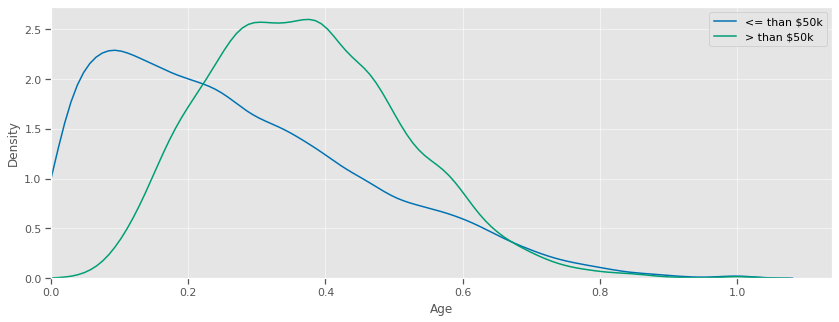

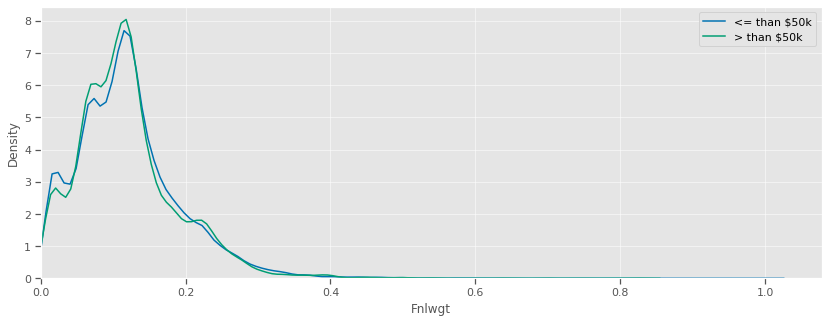

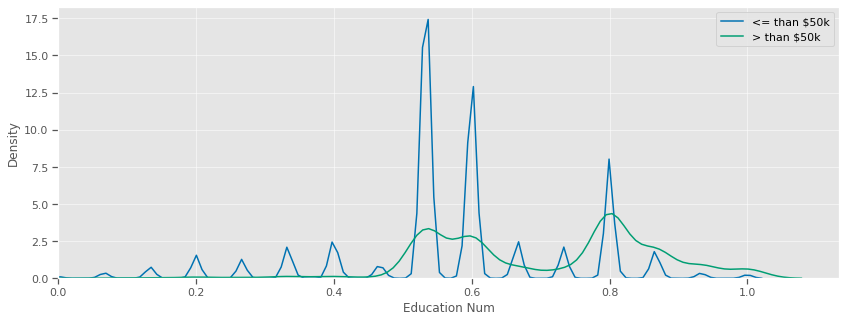

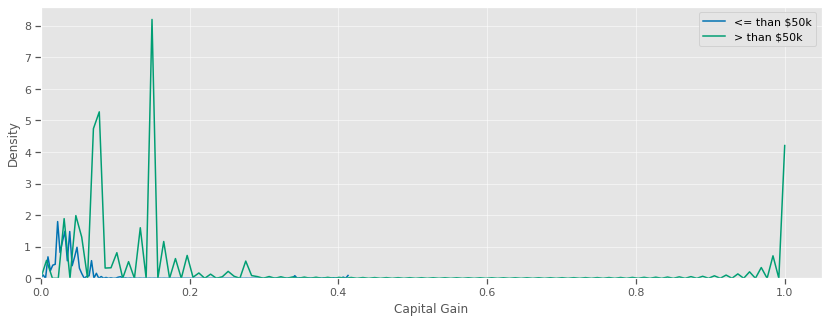

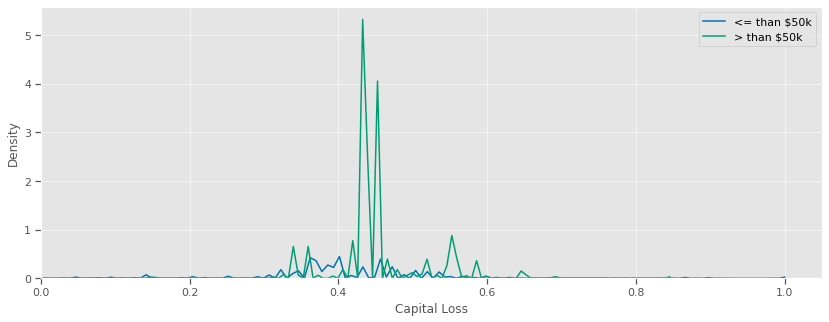

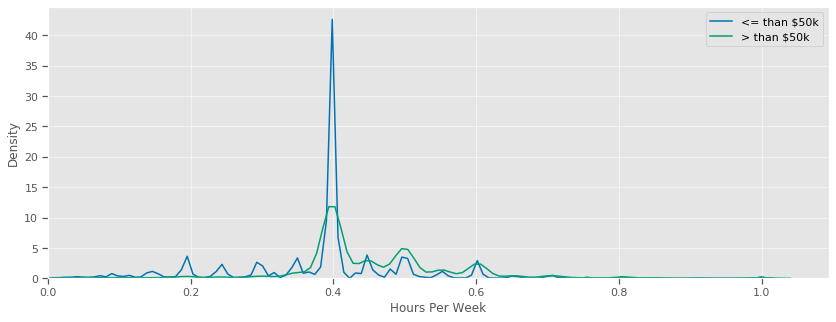

In [61]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    sns.kdeplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
    sns.kdeplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    plt.xlabel(col)
    plt.xlim(left=0)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status');

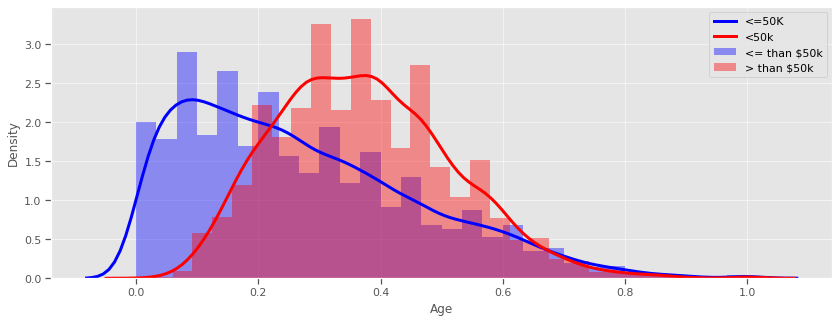

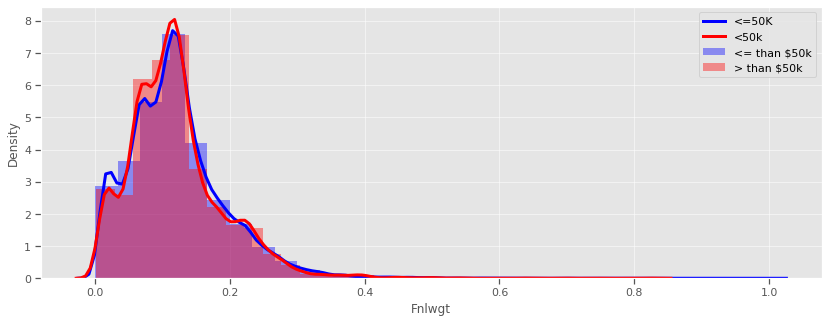

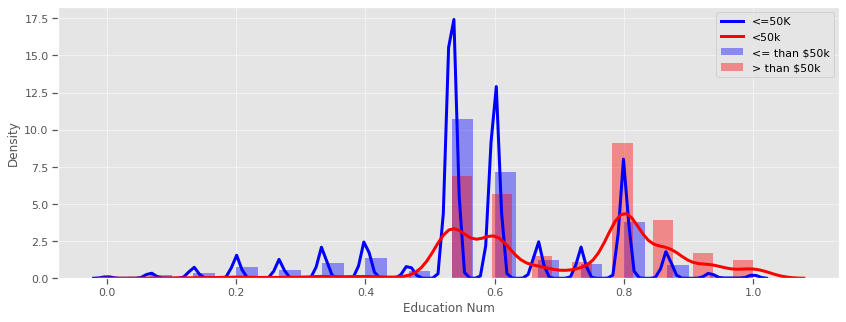

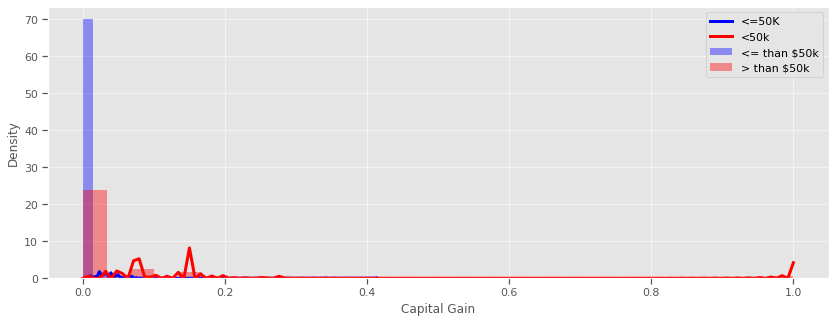

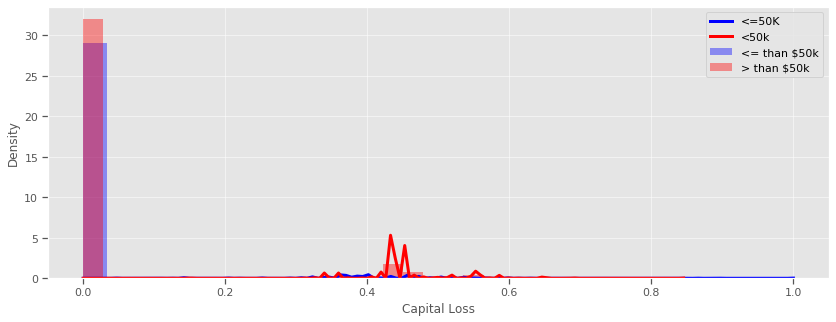

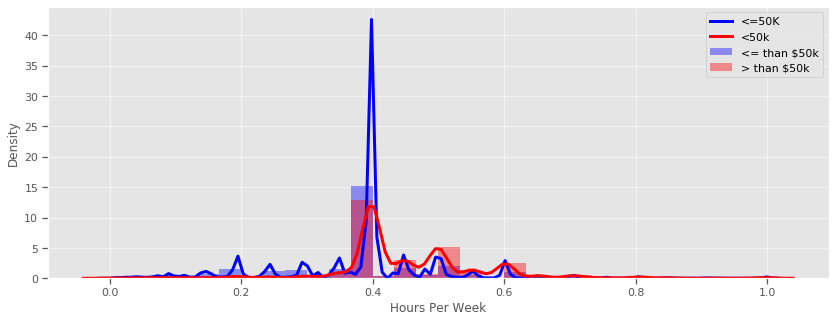

In [62]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
#     sns.kdeplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
#     sns.kdeplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    sns.distplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k',bins=30, kde_kws={"color": "b", "lw": 3, "label": "<=50K"}, hist_kws={"color": "b", "label": "<=50K"} )
    sns.distplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k',bins=30, kde_kws={"color": "r", "lw": 3, "label": "<50k"},  hist_kws={"color": "r", "label": "<50k"}) 
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


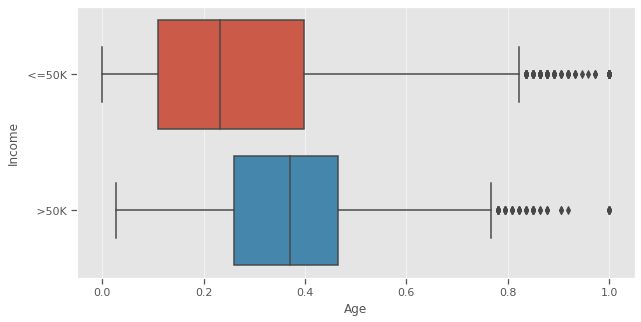

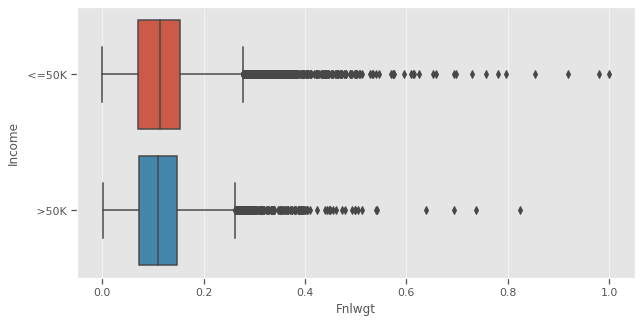

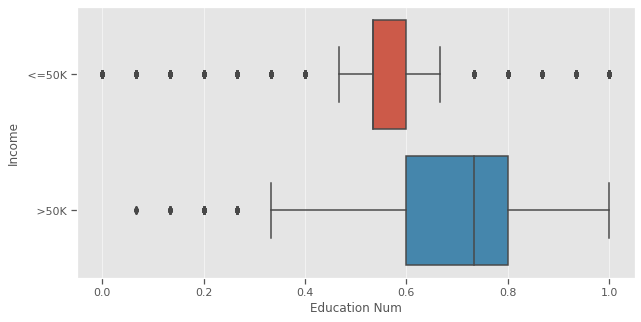

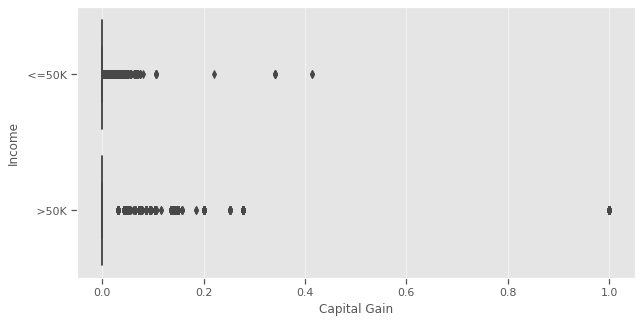

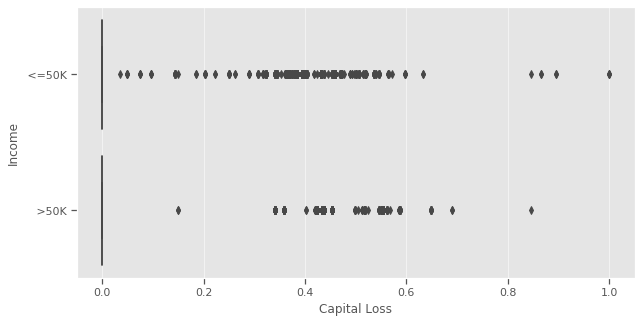

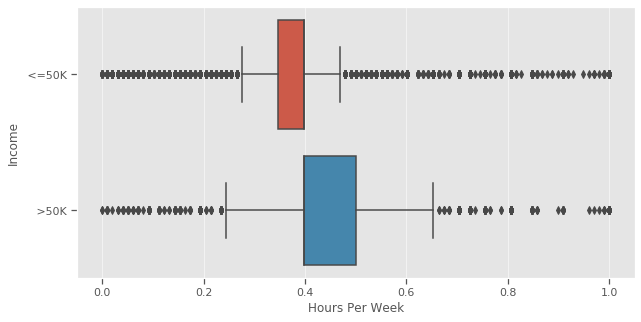

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(10,5))
    plt.style.use('ggplot')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
#     sns.boxplot(x= 'Income', y=col, data = df)
    sns.boxplot(y= 'Income', x=col, data = df)
    #sns.ditplot(df.loc[df['Income'] == ' <=50K', col], label = '> than $50k', kde=True,
    plt.xlabel(col)
    plt.ylabel("Income")
    #plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status');

In [64]:
#one hot encoding ->ideal for logisitc regression model
df_OHE = df
for cols in catcols:
    if cols != 'Income':
        dummy = pd.get_dummies(df_OHE[cols]) #get ones for each feature
        df_OHE = pd.concat([df_OHE, pd.get_dummies(df_OHE[cols])], axis = 1)
        df_OHE.drop([cols], axis = 1, inplace = True)
df_OHE.head()
df_OHE.drop(['Age'], axis = 1, inplace = True)
df_OHE.drop(['Income'], axis = 1, inplace = True)
df_OHE['Income'] = df['Income']
income_repl = { " ?" : np.nan, " <=50K" : 0, " >50K" : 1 }
df_OHE["Income"] = [income_repl[item] for item in df_OHE["Income"]]
df_OHE.head()


,Fnlwgt,Education Num,Capital Gain,Capital Loss,Hours Per Week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Female,Male,Mexico,Other_Native_Country,United-States,Young,Middle-Aged,Old,Retired,Income
0,0.048238,0.800000,0.0,0.0,0.122449,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0.138113,0.533333,0.0,0.0,0.397959,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0.151068,0.400000,0.0,0.0,0.397959,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0.221488,0.800000,0.0,0.0,0.397959,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
4,0.184932,0.866667,0.0,0.0,0.397959,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [65]:
#binary encoding -- >ideal for decision tree and naive bayes
import category_encoders as ce
df_BE = df
for col in catcols:
    if col != 'Income':
        encoder = ce.BinaryEncoder(cols=[col]) #get ones for each feature
        df_BE = encoder.fit_transform(df_BE) #merge to dataset
df_BE.shape
df_BE.drop(['Age'], axis = 1, inplace = True)
df_BE.drop(['Income'], axis = 1, inplace = True)
df_BE['Income'] = df['Income']
income_repl = { " ?" : np.nan, " <=50K" : 0, " >50K" : 1 }
df_BE["Income"] = [income_repl[item] for item in df_BE["Income"]]
df_BE.head()



,Workclass_0,Workclass_1,Workclass_2,Workclass_3,Fnlwgt,Education Num,Marital Status_0,Marital Status_1,Marital Status_2,Marital Status_3,...,Capital Gain,Capital Loss,Hours Per Week,Native Country_0,Native Country_1,Native Country_2,age_labels_0,age_labels_1,age_labels_2,Income
0,0,0,0,1,0.048238,0.800000,0,0,0,1,...,0.0,0.0,0.122449,0,0,1,1,0,0,0
1,0,0,1,0,0.138113,0.533333,0,0,1,0,...,0.0,0.0,0.397959,0,0,1,0,1,1,0
2,0,0,1,0,0.151068,0.400000,0,0,0,1,...,0.0,0.0,0.397959,0,0,1,1,0,0,0
3,0,0,1,0,0.221488,0.800000,0,0,0,1,...,0.0,0.0,0.397959,0,1,0,0,0,1,0
4,0,0,1,0,0.184932,0.866667,0,0,0,1,...,0.0,0.0,0.397959,0,0,1,0,1,0,0


In [66]:
df_BE.isnull().sum()

Workclass_0         0
Workclass_1         0
Workclass_2         0
Workclass_3         0
Fnlwgt              0
Education Num       0
Marital Status_0    0
Marital Status_1    0
Marital Status_2    0
Marital Status_3    0
Occupation_0        0
Occupation_1        0
Occupation_2        0
Occupation_3        0
Occupation_4        0
Relationship_0      0
Relationship_1      0
Relationship_2      0
Relationship_3      0
Race_0              0
Race_1              0
Race_2              0
Race_3              0
Sex_0               0
Sex_1               0
Capital Gain        0
Capital Loss        0
Hours Per Week      0
Native Country_0    0
Native Country_1    0
Native Country_2    0
age_labels_0        0
age_labels_1        0
age_labels_2        0
Income              0
dtype: int64

Name columns and preprocess some of the data inside the DF

Preprocessing Key:

age: continuous.
<br>
workclass: Private : 0 , Self-emp-not-inc : 1 , Self-emp-inc : 2 , Federal-gov : 3, Local-gov : 4, State-gov : 5, Without-pay : 6, Never-worked : 7.
<br>
fnlwgt: continuous.
<br>
education: Bachelors : 0, Some-college : 1, 11th : 2, HS-grad : 3, Prof-school : 4, Assoc-acdm : 5, Assoc-voc : 6, 9th : 7, 7th-8th : 8, 12th : 9, Masters : 10, 1st-4th : 11, 10th : 12, Doctorate : 13, 5th-6th : 14, Preschool : 15.
<br>
education-num: continuous.
<br>
marital-status: Married-civ-spouse : 0, Divorced : 1, Never-married : 2, Separated : 3, Widowed : 4, Married-spouse-absent : 5, Married-AF-spouse : 6.
<br>
occupation: Tech-support : 0, Craft-repair : 1, Other-service : 2, Sales : 3, Exec-managerial : 4, Prof-specialty : 5, Handlers-cleaners : 6, Machine-op-inspct : 7, Adm-clerical : 8, Farming-fishing : 9, Transport-moving : 10, Priv-house-serv : 11, Protective-serv : 12, Armed-Forces : 13.
<br>
relationship: Wife : 0 , Own-child : 1 , Husband : 2, Not-in-family : 3, Other-relative : 4, Unmarried : 5.
<br>
race: White : 0, Asian-Pac-Islander : 1, Amer-Indian-Eskimo : 2, Other : 3, Black : 4.
<br>
sex: Female : 0, Male : 1.
<br>
capital-gain: continuous.
<br>
capital-loss: continuous.
<br>
hours-per-week: continuous.
<br>
native-country: United-States : 0, Cambodia : 1, England : 2, Puerto-Rico : 3, Canada : 4, Germany : 5, Outlying-US(Guam-USVI-etc) : 6, India : 7, Japan : 8, Greece : 9, South : 10, China : 11, Cuba : 12, Iran : 13, Honduras : 14, Philippines : 15, Italy : 16, Poland : 17, Jamaica : 18, Vietnam : 19, Mexico : 20, Portugal : 21, Ireland : 22, France : 23, Dominican-Republic : 24, Laos : 25, Ecuador : 26, Taiwan : 27, Haiti : 28, Columbia : 29, Hungary : 30, Guatemala : 31, Nicaragua : 32, Scotland : 33, Thailand : 34, Yugoslavia : 35, El-Salvador : 36, Trinadad&Tobago : 37, Peru : 38, Hong : 39, Holand-Netherlands : 40.
<br>

In [67]:
colnames = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours Per Week",
    "Native Country",
    "Income"
]

dataframe.columns = colnames

workclass_repl = {
    " Private" : 0, 
    " Self-emp-not-inc" : 1, 
    " Self-emp-inc" : 2,
    " Federal-gov" : 3, 
    " Local-gov" : 4,
    " State-gov" : 5,
    " Without-pay" : 6,
    " Never-worked" : 7,
    " ?" : np.nan
}

dataframe["Workclass"] = [workclass_repl[item] for item in dataframe["Workclass"]]

education_repl = { " Bachelors" : 0, " Some-college" : 1, " 11th" : 2, " HS-grad" : 3, " Prof-school" : 4, " Assoc-acdm" : 5, " Assoc-voc" : 6, " 9th" : 7, " 7th-8th" : 8, " 12th" : 9, " Masters" : 10, " 1st-4th" : 11, " 10th" : 12, " Doctorate" : 13, " 5th-6th" : 14, " Preschool" : 15 }
dataframe["Education"] = [education_repl[item] for item in dataframe["Education"]]

marital_repl = {" Married-civ-spouse" : 0, " Divorced" : 1, " Never-married" : 2, " Separated" : 3, " Widowed" : 4, " Married-spouse-absent" : 5, " Married-AF-spouse" : 6 }
dataframe["Marital Status"] = [marital_repl[item] for item in dataframe["Marital Status"]]

occupation_repl = { " ?" : np.nan, " Tech-support" : 0, " Craft-repair" : 1, " Other-service" : 2, " Sales" : 3, " Exec-managerial" : 4, " Prof-specialty" : 5, " Handlers-cleaners" : 6, " Machine-op-inspct" : 7, " Adm-clerical" : 8, " Farming-fishing" : 9, " Transport-moving" : 10, " Priv-house-serv" : 11, " Protective-serv" : 12, " Armed-Forces" : 13 }
dataframe["Occupation"] = [occupation_repl[item] for item in dataframe["Occupation"]]

relationship_repl = { " ?" : np.nan, " Wife" : 0 , " Own-child" : 1 , " Husband" : 2, " Not-in-family" : 3, " Other-relative" : 4, " Unmarried" : 5 }
dataframe["Relationship"] = [relationship_repl[item] for item in dataframe["Relationship"]]

race_repl = { " ?" : np.nan, " White" : 0, " Asian-Pac-Islander" : 1, " Amer-Indian-Eskimo" : 2, " Other" : 3, " Black" : 4 }
dataframe["Race"] = [race_repl[item] for item in dataframe["Race"]]

sex_repl = { " ?" : np.nan, " Female" : 0, " Male" : 1 }
dataframe["Sex"] = [sex_repl[item] for item in dataframe["Sex"]]

country_repl = { " ?" : np.nan, " United-States" : 0, " Cambodia" : 1, " England" : 2, " Puerto-Rico" : 3, " Canada" : 4, " Germany" : 5, " Outlying-US(Guam-USVI-etc)" : 6, " India" : 7, " Japan" : 8, " Greece" : 9, " South" : 10, " China" : 11, " Cuba" : 12, " Iran" : 13, " Honduras" : 14, " Philippines" : 15, " Italy" : 16, " Poland" : 17, " Jamaica" : 18, " Vietnam" : 19, " Mexico" : 20, " Portugal" : 21, " Ireland" : 22, " France" : 23, " Dominican-Republic" : 24, " Laos" : 25, " Ecuador" : 26, " Taiwan" : 27, " Haiti" : 28, " Columbia" : 29, " Hungary" : 30, " Guatemala" : 31, " Nicaragua" : 32, " Scotland" : 33, " Thailand" : 34, " Yugoslavia" : 35, " El-Salvador" : 36, " Trinadad&Tobago" : 37, " Peru" : 38, " Hong" : 39, " Holand-Netherlands" : 40 }
dataframe["Native Country"] = [country_repl[item] for item in dataframe["Native Country"]]

income_repl = { " ?" : np.nan, " <=50K" : 0, " >50K" : 1 }
dataframe["Income"] = [income_repl[item] for item in dataframe["Income"]]

#First drop NA values
dataframe = dataframe.dropna()
dataframe

,Age,Workclass,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,1.0,83311,0,13,0,4.0,2,0,1,0,0,13,0.0,0
1,38,0.0,215646,3,9,1,6.0,3,0,1,0,0,40,0.0,0
2,53,0.0,234721,2,7,0,6.0,2,4,1,0,0,40,0.0,0
3,28,0.0,338409,0,13,0,5.0,0,4,0,0,0,40,12.0,0
4,37,0.0,284582,10,14,0,4.0,0,0,0,0,0,40,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.0,257302,5,12,0,0.0,0,0,0,0,0,38,0.0,0
32556,40,0.0,154374,3,9,0,7.0,2,0,1,0,0,40,0.0,1
32557,58,0.0,151910,3,9,4,8.0,5,0,0,0,0,40,0.0,0
32558,22,0.0,201490,3,9,2,8.0,1,0,1,0,0,20,0.0,0


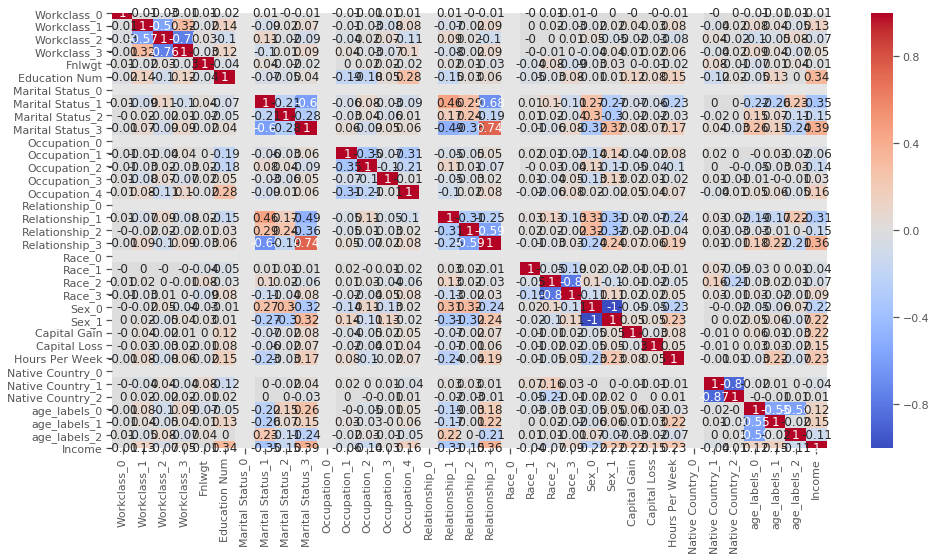

In [68]:
#heatmap for Binary encoding dataframe
plt.figure(figsize=(16, 8))
sns.heatmap(round(df_BE.corr(), 2),cmap='coolwarm',annot=True)

Generate Test/Train split rohan version

In [69]:
from sklearn.model_selection import train_test_split
#splits data on output variable
def splitXandY(data):
    #getting column names then dropping the income index and splitting the x and y values
    X = data.iloc[:,0:data.shape[1]-1]
    Y = data.iloc[:, -1]
    return X, Y
#splits data
def createSplits(dataX, dataY):
    x_train, x_test, y_train, y_test = train_test_split(dataX, dataY)
    y_train = y_train.ravel()
    y_test  = y_test.ravel()
    return x_train, x_test, y_train, y_test

def makeSplit(data):
    x, y = splitXandY(data)
    x_train, x_test, y_train, y_test = train_test_split = createSplits(x, y)
    return x_train, x_test, y_train, y_test
    

In [70]:
def split_on_val_eq(X_test, Y_test, column, val):
    ## TYPE ANSWER HERE 
    X0_test = []
    X1_test = []
    Y0_test = []
    Y1_test = []
    
    for ind in range(0, X_test.shape[0]):
        if X_test[ind][column] == val:
            X0_test.append(X_test[ind])
            Y0_test.append(Y_test[ind])
        else:
            X1_test.append(X_test[ind])
            Y1_test.append(Y_test[ind])
    
    return (X0_test, X1_test, Y0_test, Y1_test)

def error(y, y_hat):
    count = 0
    total_instances = len(y)
    
    def check(elem):
        nonlocal count
        cond = elem != y_hat[count]
        count += 1
        return cond
    
    total_error = len(list(filter(check, y)))
    ans = round(((total_error)/(total_instances)), 3)
    
    return ans

## INPUTS:
# y - true labels
# y_hat - predicted labels
def accuracy(y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            tp += 1
        elif y[x] == 0 and y_hat[x] == 1:
            fp += 1
        elif y[x] == 0 and y_hat[x] == 0:
            tn += 1
        elif y[x] == 1 and y_hat[x] == 0:
            fn += 1
    ans = round((tp + tn) / (tp + tn + fp + fn), 3)
    return ans
#Precision
#Percentage of positive instances out of the total predicted positive instances. 
#Here denominator is the model prediction done as positive from the whole given dataset. 
#Take it as to find out ‘how much the model is right when it says it is right’.
def precision(y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            tp += 1
        elif y[x] == 0 and y_hat[x] == 1:
            fp += 1
        elif y[x] == 0 and y_hat[x] == 0:
            tn += 1
        elif y[x] == 1 and y_hat[x] == 0:
            fn += 1
    ans = round((tp)/(tp+fp), 3)
    return ans

#recall/TPR
def recall(y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            tp += 1
        elif y[x] == 0 and y_hat[x] == 1:
            fp += 1
        elif y[x] == 0 and y_hat[x] == 0:
            tn += 1
        elif y[x] == 1 and y_hat[x] == 0:
            fn += 1
    ans = round(((tp)/(tp+fn)), 3)
    return ans
#Specificity
#Percentage of negative instances out of the total actual negative instances. 
#Therefore denominator (TN + FP) here is the actual number of negative instances present in the dataset. 
#It is similar to recall but the shift is on the negative instances. 
#Like finding out how many healthy patients were not having cancer and were told they don’t have cancer. 
#Kind of a measure to see how separate the classes are.
def specificity(y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            tp += 1
        elif y[x] == 0 and y_hat[x] == 1:
            fp += 1
        elif y[x] == 0 and y_hat[x] == 0:
            tn += 1
        elif y[x] == 1 and y_hat[x] == 0:
            fn += 1
    ans = round((tn)/(tn+fn), 3)
    return ans
#f1-score
#F1 = 2 * (precision * recall) / (precision + recall)
#It is the harmonic mean of precision and recall. This takes the contribution of both, 
# so higher the F1 score, the better. See that due to the product in the numerator 
# if one goes low, the final F1 score goes down significantly. So a model does well 
# in F1 score if the positive predicted are actually positives (precision) and doesn't 
# miss out on positives and predicts them negative (recall).
def f1score(precision, recall):
    num = 2 * (precision * recall)
    den = (precision + recall)
    ans = num/den
    ans = round(ans, 3)
    return ans
    
def true_positives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            result += 1
            
    return result

def false_positives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 0 and y_hat[x] == 1:
            result += 1
            
    return result

def false_negatives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 0:
            result += 1
    return result

def true_negatives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 0 and y_hat[x] == 0:
            result += 1
            
    return result

def true_negatives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 0 and y_hat[x] == 0:
            result += 1
            
    return result

# Some rate methods
def true_positive_rate(y, y_hat):
    tp = true_positives(y, y_hat)
    fn = false_negatives(y, y_hat)
    
    return tp / (tp + fn) if tp != 0 else 0

def false_positive_rate(y, y_hat):
    tn = true_negatives(y, y_hat)
    fp = false_positives(y, y_hat)
    
    return fp / (fp + tn) if fp != 0 else 0

def false_negative_rate(y, y_hat):
    tp = true_positives(y, y_hat)
    fn = false_negatives(y, y_hat)
    
    return fn / (tp + fn) if fn != 0 else 0

1. A method to select rows in the dataset where a feature we specify equals a value we pass to the function.
2. A method to compute error given a set of predicted labels and a set of true labels

Import sklearn and initialize decision tree/logreg solvers

In [71]:
data_x_train, data_x_test, data_y_train, data_y_test = makeSplit(dataframe) #split on rohans dataframe
df_BE_x_train, df_BE_x_test, df_BE_y_train, df_BE_y_test = makeSplit(df_BE) #split on Binary_encoded Values
df_OHE_x_train, df_OHE_x_test, df_OHE_y_train, df_OHE_y_test = makeSplit(df_OHE) #split on One-Hot-Encoded-Values
#size = dataframe.values.shape[1] - 1

# #attributes not including prediction label
# X = dataframe.values[:, :size]
# #prediction label
# Y = dataframe.values[:, size:]

# x_train = X[:20000, :] #~70/30 split
# x_test  = X[20000:, :]
# y_train = Y[:20000, :]
# y_test  = Y[20000:, :]

# y_train = y_train.ravel()
# y_test  = y_test.ravel()

In [72]:
from sklearn import linear_model, tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt

dt = tree.DecisionTreeClassifier(max_depth=5)
logreg = linear_model.LogisticRegression(solver='liblinear')

Split on rows where sex = male/female and compute error
<br>
First show accuracy with logistic regression model

In [73]:
#make model based on splits for various dfs

#logisitc regression models
LR_model_data = logreg.fit(data_x_train, data_y_train)
y_pred_LR_model_data = LR_model_data.predict(data_x_test)

LR_model_df_BE = logreg.fit(df_BE_x_train, df_BE_y_train)
y_pred_LR_model_df_BE = LR_model_df_BE.predict(df_BE_x_test)

LR_model_df_OHE = logreg.fit(df_OHE_x_train, df_OHE_y_train)
y_pred_LR_model_df_OHE = LR_model_df_OHE.predict(df_OHE_x_test)

#decision tree models
DT_model_data = dt.fit(data_x_train, data_y_train)
y_pred_DT_model_data = DT_model_data.predict(data_x_test)

DT_model_df_BE = dt.fit(df_BE_x_train, df_BE_y_train)
y_pred_DT_model_df_BE = DT_model_df_BE.predict(df_BE_x_test)

DT_model_df_OHE = dt.fit(df_OHE_x_train, df_OHE_y_train)
y_pred_DT_model_df_OHE = DT_model_df_OHE.predict(df_OHE_x_test)


In [148]:
#Display accuracy, precision, recall, specificity, f1-score
models = ["Base Model", "One Hot Encoded Model", "Binary Encoded Model"]
ytests = [data_y_test, df_OHE_y_test, df_BE_y_test]
LRpreds = [y_pred_LR_model_data, y_pred_LR_model_df_OHE, y_pred_LR_model_df_BE]
DTpreds = [y_pred_DT_model_data,  y_pred_DT_model_df_OHE, y_pred_DT_model_df_BE]
acc = []
prec = []
rec = []
spec = []
f1 = []
dsType = []
modType = []
for yT, LRpred, DTpred, m in zip(ytests, LRpreds, DTpreds, models):
    print(dsType.append(m))
    print(modType.append('Logistic Regression Model'))
    print('  Accuracy: ', acc.append(accuracy(yT, LRpred)), 'Precision: ', prec.append(precision(yT, LRpred)),
          'Recall: ', rec.append(recall(yT, LRpred)), 'Specificity: ', spec.append(specificity(yT, LRpred)), 
          'f1-score: ', f1.append(f1score(precision(yT, LRpred), recall(yT, LRpred))))
    print(dsType.append(m))
    print(modType.append('Decision Tree Model'))
    print('  Accuracy: ', acc.append(accuracy(yT, DTpred)), 'Precision: ', prec.append(precision(yT, DTpred)),
          'Recall: ', rec.append(recall(yT, DTpred)), 'Specificity: ', spec.append(specificity(yT, DTpred)),
          'f1-score: ', f1.append(f1score(precision(yT, DTpred), recall(yT, DTpred))))
    print()
    
    
    
    

None
None
  Accuracy:  None Precision:  None Recall:  None Specificity:  None f1-score:  None
None
None
  Accuracy:  None Precision:  None Recall:  None Specificity:  None f1-score:  None

None
None
  Accuracy:  None Precision:  None Recall:  None Specificity:  None f1-score:  None
None
None
  Accuracy:  None Precision:  None Recall:  None Specificity:  None f1-score:  None

None
None
  Accuracy:  None Precision:  None Recall:  None Specificity:  None f1-score:  None
None
None
  Accuracy:  None Precision:  None Recall:  None Specificity:  None f1-score:  None



In [172]:
#charts of accuracy ect
d = {'datasetType': dsType, 'modelType': modType, 'accuracy': acc, 'precision': prec, 'recall': rec, 'specificity': spec, 'f1-score': f1}
metrics = pd.DataFrame(data=d)
numdf = metrics.select_dtypes(include=numerics)
metCols = numdf.columns.tolist()
metrics
# np.asarray(acc)
# df2 = pd.DataFrame(np.array(acc, prec, rec, spec, f1),
#                     columns=['accuracy', 'precision', 'recall', 'specificity', 'f1-score'])

,datasetType,modelType,accuracy,precision,recall,specificity,f1-score
0,Base Model,Logistic Regression Model,0.784,0.723,0.273,0.790,0.396
1,Base Model,Decision Tree Model,0.845,0.807,0.531,0.853,0.641
2,One Hot Encoded Model,Logistic Regression Model,0.851,0.739,0.602,0.879,0.664
3,One Hot Encoded Model,Decision Tree Model,0.851,0.779,0.544,0.866,0.641
4,Binary Encoded Model,Logistic Regression Model,0.843,0.724,0.558,0.870,0.630
5,Binary Encoded Model,Decision Tree Model,0.840,0.731,0.530,0.863,0.614


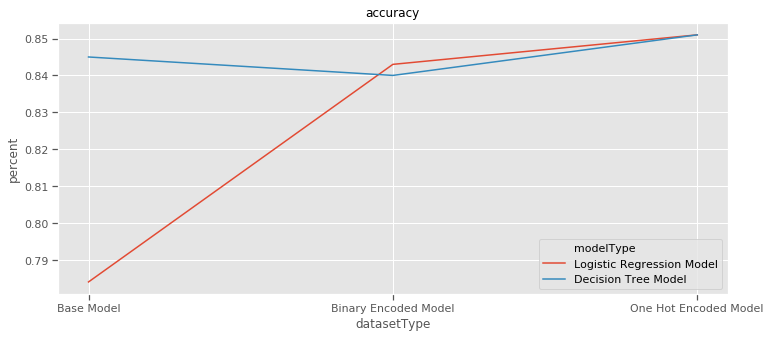

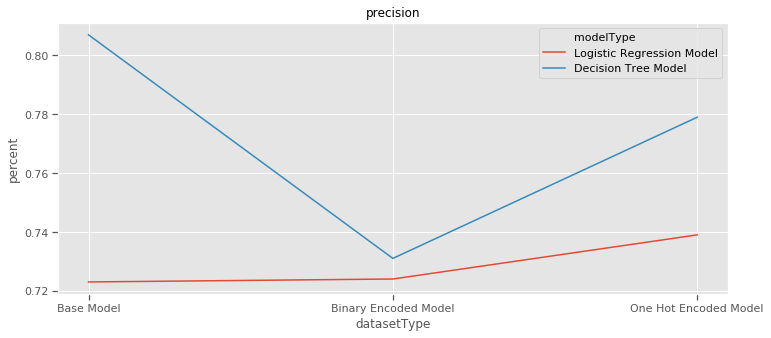

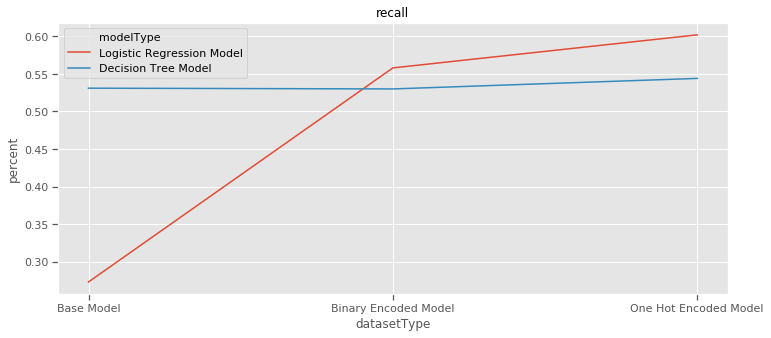

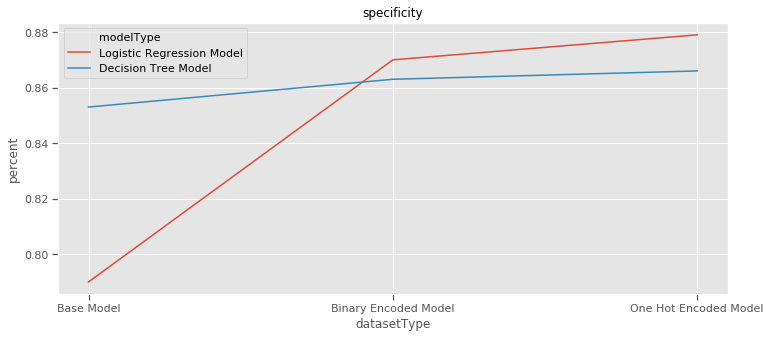

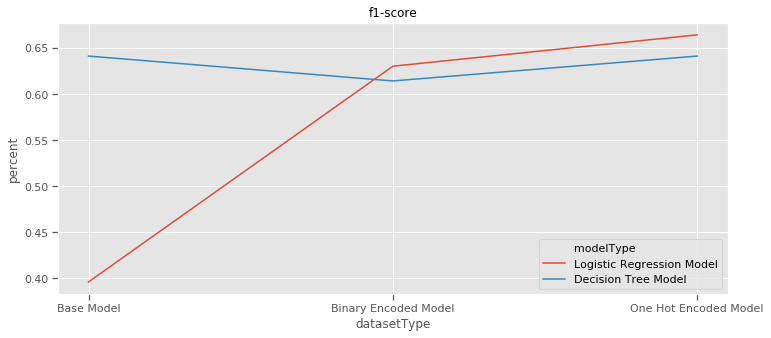

In [168]:
for col in metCols:
#     plt.style.use('seaborn-colorblind')
    plt.figure(figsize=(12,5))
    plt.style.use('ggplot')
    sns.set_context("notebook")
    sns.lineplot(x = 'datasetType', y = col, hue = 'modelType', data = metrics).set_title(col)
#     sns.relplot(x = 'modelType', y = col, hue = 'datasetType', data = metrics, kind="line")
    plt.ylabel('percent')
    plt.legend()
    plt.show()

In [95]:
#develop roc curve
#logisticRegression model
for yT, LRpred, DTpred, m in zip(ytests, LRpreds, DTpreds, models):
    ns_probs = [0 for _ in range(len(yT))]
    lr_probs = LRpred[:, 1]
    ns_auc = roc_auc_score(yT, ns_probs)
    lr_auc = roc_auc_score(yT, lr_probs)
    ns_fpr, ns_tlineplotpr, _ = roc_curve(yT, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(yT, lr_probs)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    

IndexError: too many indices for array

In [76]:
model = logreg.fit(data_x_train, data_y_train)


(femaleX, _, femaleY, _) = split_on_val_eq(data_x_test.to_numpy(), data_y_test, 9, 0)
(maleX, _, maleY, _) = split_on_val_eq(data_x_test.to_numpy(), data_y_test, 9, 1)

pred_male = model.predict(maleX)
pred_female = model.predict(femaleX)

err_male = accuracy(maleY, pred_male)
err_female = accuracy(femaleY, pred_female)

print("Total female: " + str(len(femaleX)))
print("Total male: " + str(len(maleX)))

print("Accuracy when sex = male: " + str(err_male))
print("Accuracy when sex = female: " + str(err_female))
print("# of False Negatives when sex = female: " + str(false_negatives(femaleY, pred_female)))
print("# of False Negatives when sex = male: " + str(false_negatives(maleY, pred_male)))

Total female: 2382
Total male: 5159
Accuracy when sex = male: 0.734
Accuracy when sex = female: 0.891
# of False Negatives when sex = female: 202
# of False Negatives when sex = male: 1223


Now show details with decision tree model

In [77]:
model = dt.fit(x_train, y_train)

(femaleX, _, femaleY, _) = split_on_val_eq(x_test, y_test, 9, 0)
(maleX, _, maleY, _) = split_on_val_eq(x_test, y_test, 9, 1)

pred_male = model.predict(maleX)
pred_female = model.predict(femaleX)

err_male = accuracy(maleY, pred_male)
err_female = accuracy(femaleY, pred_female)

print("Total female: " + str(len(femaleX)))
print("Total male: " + str(len(maleX)))

print("Accuracy when sex = male: " + str(err_male))
print("Accuracy when sex = female: " + str(err_female))
print("# of False Negatives when sex = female: " + str(false_negatives(femaleY, pred_female)))
print("# of False Negatives when sex = male: " + str(false_negatives(maleY, pred_male)))

NameError: name 'x_train' is not defined

Above shows there is ~7% increase in accuracy for male individuals and ~2% increase in accuracy for females. Also, using a decision tree model, we've reduced the number of false negatives for both sexes.

In [181]:
def fnr_per_att(dataframe, model, x_test, y_test):
    dataframe = dataframe.astype('int32')
    max_fn = -1
    max_fn_col  = None
    max_fn_val  = None
    counter = 0

    skip = ["Fnlwgt", "Capital Gain", "Capital Loss", "Education Num", "Hours Per Week"]

    for i in range(0, len(dataframe.columns) - 1):
        if dataframe.columns[i] in skip:
            continue

        for x in range(dataframe[dataframe.columns[i]].min(), dataframe[dataframe.columns[i]].max() + 1):
            (X, _, Y, _) = split_on_val_eq(x_test.to_numpy(), y_test, i, x)

            if X == []:
                continue

            pred = model.predict(X)
            fn = false_negative_rate(Y, pred)
            if fn > 0.5:
                print(dataframe.columns[i], "value: " + str(x), "false negative rate: " + str(fn), "total instances: " + str(len(X)), sep=', ')
                counter=counter+1
            if fn > max_fn:
                max_fn = fn
                max_fn_col = i
                max_fn_val = x
    return counter

print("OHE Features with Significant FNR Threshold Values")
print("----------------------------------------------------------")
print(fnr_per_att(df_OHE, DT_model_df_OHE, df_OHE_x_test, df_OHE_y_test))
print("Base Features with Significant FNR Threshold Values")
print("----------------------------------------------------------")
print(fnr_per_att(dataframe, LR_model_data, data_x_test, data_y_test))

OHE Features with Significant FNR Threshold Values
----------------------------------------------------------
 Federal-gov, value: 1, false negative rate: 0.6097560975609756, total instances: 218
 Self-emp-not-inc, value: 1, false negative rate: 0.5024154589371981, total instances: 676
 Divorced, value: 1, false negative rate: 0.7560975609756098, total instances: 1115
 Married-AF-spouse, value: 1, false negative rate: 1.0, total instances: 5
 Married-civ-spouse, value: 0, false negative rate: 0.7064846416382252, total instances: 4335
 Married-spouse-absent, value: 1, false negative rate: 0.8, total instances: 80
 Never-married, value: 1, false negative rate: 0.672, total instances: 2625
 Separated, value: 1, false negative rate: 0.6428571428571429, total instances: 251
 Widowed, value: 1, false negative rate: 0.5909090909090909, total instances: 259
 Adm-clerical, value: 1, false negative rate: 0.592, total instances: 950
 Craft-repair, value: 1, false negative rate: 0.6964285714285714

Occupation, value: 1, false negative rate: 0.751131221719457, total instances: 1011
Occupation, value: 2, false negative rate: 0.8205128205128205, total instances: 806
Occupation, value: 3, false negative rate: 0.6992753623188406, total instances: 898
Occupation, value: 4, false negative rate: 0.6979591836734694, total instances: 983
Occupation, value: 5, false negative rate: 0.7217573221757322, total instances: 1057
Occupation, value: 6, false negative rate: 0.7647058823529411, total instances: 365
Occupation, value: 7, false negative rate: 0.8135593220338984, total instances: 455
Occupation, value: 8, false negative rate: 0.6893939393939394, total instances: 900
Occupation, value: 9, false negative rate: 0.7027027027027027, total instances: 245
Occupation, value: 10, false negative rate: 0.8271604938271605, total instances: 417
Occupation, value: 12, false negative rate: 0.7678571428571429, total instances: 147
Relationship, value: 0, false negative rate: 0.7732558139534884, total in

Check error for different sample sizes on logreg and dt models. Decision tree appears to give the most accurate results (at a depth of 5).

In [871]:
# plot_data_dt = {"sample_size": [], "test_error": []}
# plot_data_lg = {"sample_size": [], "test_error": []}

# for n in range(100, 20000, 100):
#     n_rows_x = x_train[:n, :]
#     n_rows_y = y_train[:n]
    
#     model_dt = dt.fit(n_rows_x, n_rows_y)
#     model_lg = logreg.fit(n_rows_x, n_rows_y)

#     pred_dt  = model_dt.predict(x_test)
#     pred_logreg  = model_lg.predict(x_test)
    
#     plot_data_dt["sample_size"].append(n)
#     plot_data_dt["test_error"].append(error(y_test[:n], pred_dt))
    
#     plot_data_lg["sample_size"].append(n)
#     plot_data_lg["test_error"].append(error(y_test[:n], pred_logreg))
    
# plt.title('Sample Size vs Test Error for DT and LR Results')
# plt.xlabel('Sample Size')
# plt.ylabel('Test Error')
    
# plt.plot(plot_data_dt["sample_size"], plot_data_dt["test_error"], color='blue', label='Decision Tree')
# plt.plot(plot_data_lg["sample_size"], plot_data_lg["test_error"], color='red', label='Logistic Regression')
# plt.legend()

# plt.show()